# Introduction to Artificial Neural Nets - Companion Notebook

## Notation map

**Notation Map for the 2–2–1 Neural Network**

| Symbol                       | Meaning                                   | In Code                        | Layer           |
| ---------------------------- | ----------------------------------------- | ------------------------------ | --------------- |
| $x_1, x_2$                   | Inputs                                    | `x = [0.10, 0.20]`             | Input layer     |
| $w_{11}^{[1]}, w_{12}^{[1]}$             | Weights from $x_1$ to hidden layer          | `W_1[0, :] = [0.12, 0.18]`    | Input → Hidden  |
| $w_{21}^{[1]}, w_{22}^{[1]}$             | Weights from $x_2$ to hidden layer          | `W_1[1, :] = [0.22, 0.28]`    | Input → Hidden  |
| $b_1^{[1]}, b_2^{[1]}$                   | Biases of hidden layer                      | `b_1 = [0.35, 0.35]`           | Hidden layer    |
| $z_1^{[1]}, z_2^{[1]}$                   | Pre-activation of hidden layer       | `z_1 = x @ W_1 + b_1`     | Hidden layer    |
| $a_1^{[1]}, a_2^{[1]}$                   | Activations of hidden layer             | `a_1 = sigmoid(z_1)`  | Hidden layer    |
| $w_{11}^{[2]}, w_{12}^{[2]}$ | Weights from hidden layer to output layer  | `W_2 = [0.40, 0.45]`          | Hidden → Output |
| $b_1^{[2]}$                        | Bias of output neuron                     | `b_2_1 = 0.60`                   | Output layer    |
| $z_{1}^{[2]}$             | Pre-activation of output neuron     | `np.dot(a_1, W_2) + b_2_1` | Output layer    |
| $\hat{y}$                    | Network prediction (activation of output) | `sigmoid(z_2)`               | Output layer    |
| $y$                          | True label / target                       | `y = 0.01`                     | Ground truth    |
| $L$                          | Loss function                             | $\frac{1}{2}(y - \hat{y})^2$   | Loss            |

Layer Summary:

* **Input layer:** 2 nodes → $x_1, x_2$
* **Hidden layer:** 2 neurons → $h_1, h_2$
* **Output layer:** 1 neuron → $\hat{y}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Symbolic Derivation of Gradients
We compute derivatives of the loss function with respect to the weights symbolically.

In [2]:
# Define symbols
x1, x2, w11, w21, b1 = sp.symbols('x1 x2 w11 w21 b1')
z1 = x1 * w11 + x2 * w21 + b1
a_1_1 = 1 / (1 + sp.exp(-z1))

sp.simplify(sp.diff(a_1_1, w11))

x1/(4*cosh(b1/2 + w11*x1/2 + w21*x2/2)**2)

## Visualization: Sigmoid Function and Its Derivative

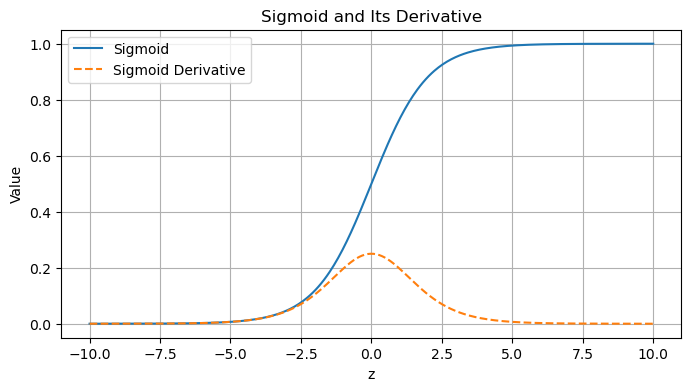

In [3]:
z = np.linspace(-10, 10, 400)
s = sigmoid(z)
ds = s * (1 - s)

plt.figure(figsize=(8,4))
plt.plot(z, s, label='Sigmoid')
plt.plot(z, ds, label="Sigmoid Derivative", linestyle='--')
plt.title('Sigmoid and Its Derivative')
plt.legend()
plt.grid(True)
plt.xlabel('z')
plt.ylabel('Value')
plt.show()

# Solutions to Exercises

## Exercise 1: Forward Pass
**Given:**
- $x_1 = 0.10$, $x_2 = 0.20$
- $W^{[1]} = \begin{bmatrix} 0.12 & 0.18 \\ 0.22 & 0.28 \end{bmatrix}$, $b^{[1]} = [0.35, 0.35]$
- $W^{[2]} = [0.40, 0.45]$, $b^{[2]} = 0.60$

**Task:** Compute $a_1^{[1]}$, $a_2^{[1]}$ and $\hat{y}$

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.array([0.10, 0.20])
W_1 = np.array([[0.12, 0.18],
                 [0.22, 0.28]])
b_h = np.array([0.35, 0.35])

z_1 = x @ W_1 + b_h      # pre-activation (z)
a_1 = sigmoid(z_1)   # activation (a)

W_2 = np.array([0.40, 0.45])
b_o = 0.60

y_pred_input = np.dot(a_1, W_2) + b_o
y_pred = sigmoid(y_pred_input)

a_1, y_pred

(array([0.60012837, 0.60444002]), 0.752510977061568)

## Exercise 2: Output Layer Gradients
**Given:**
- $\hat{y} = 0.80$, $y = 0.10$
- $a_1^{[1]} = 0.60$, $a_2^{[1]} = 0.55$

**Task:** Compute gradients

In [5]:
y_pred = 0.80
y_true = 0.10
h = np.array([0.60, 0.55])

dL_dy = y_pred - y_true
dy_dz = y_pred * (1 - y_pred)
dz_dw = h

dL_dz = dL_dy * dy_dz
dL_dw = dL_dz * dz_dw

dL_dy, dy_dz, dL_dw

(0.7000000000000001, 0.15999999999999998, array([0.0672, 0.0616]))

## Exercise 3: Hidden Layer Gradients
**Given:**
- $\delta_{\text{out}} = 0.14$, $w_{11}^{[2]} = 0.42$, $a_1^{[1]} = 0.60$
- $x_1 = 0.05$, $x_2 = 0.10$

**Task:** Compute $\delta_1$, $\partial L/\partial w_{11}^{[1]}$ and $\partial L/\partial w_{21}^{[1]}$

In [6]:
delta_out = 0.14
w_2_11 = 0.42
a_1_1 = 0.60
x = np.array([0.05, 0.10])

dh_dz = a_1_1 * (1 - a_1_1)
delta_1 = delta_out * w_2_11 * dh_dz

dL_dw_1_11 = delta_1 * x[0]
dL_dw_1_21 = delta_1 * x[1]

delta_1, dL_dw_1_11, dL_dw_1_21

(0.014112000000000001, 0.0007056000000000001, 0.0014112000000000003)

## Exercise 4: Weight Update
**Given:**
- $\partial L/\partial w_{11}^{[1]} = 0.0008$, $\alpha = 0.1$, $w_{11}^{[1]} = 0.15$

**Task:** Compute updated weight

In [7]:
grad = 0.0008
alpha = 0.1
w_old = 0.15

w_new = w_old - alpha * grad
w_new

0.14992

# Answers to Discussion Questions

### **Exercise 1 – Discussion: Contribution to Output**

> **Question:** Which hidden neuron—$h_1$ or $h_2$—do you expect to contribute more to the final output? Why?

**Answer:**
The contribution of each hidden neuron depends on:

* Its **activation value** (output of the sigmoid),
* The **weight** from that neuron to the output neuron.

Let’s say:

* $h_1 = 0.593$, $w_{11}^{[2]} = 0.40$ → contribution ≈ $0.237$
* $h_2 = 0.597$, $w_{21}^{[2]} = 0.45$ → contribution ≈ $0.269$

So, **$h_2$** contributes slightly more to $\hat{y}$, because it has both a slightly higher activation and a stronger outgoing weight.

---

### **Exercise 2 – Discussion: Update Direction**

> **Question:** Should we update $w_{31}$ and $w_{32}$ in the same direction? Why or why not?

**Answer:**
Yes, typically both $w_{31}$ and $w_{32}$ should be **updated in the same direction** (e.g., both decreased) if:

* The output is **too high** (e.g., $\hat{y} = 0.80$, $y = 0.10$),
* And both $h_1$ and $h_2$ are **positively contributing** to the output.

The error gradient $\frac{\partial L}{\partial w_{i1}^{[2]}} = \delta_{\text{out}} \cdot a_i^{[1]}$ will be **positive**, so subtracting the gradient moves the weights downward—reducing their contribution and lowering $\hat{y}$.

---

### **Exercise 3 – Discussion: Influence of Inputs**

> **Question:** Which input—$x_1$ or $x_2$—has a larger influence on $h_1$’s gradient? Why?

**Answer:**
If both inputs are non-zero, the one with the **larger value** will contribute more to the gradient:

$$
\frac{\partial L}{\partial w_{ji}} = \delta_i \cdot x_j
$$

Given:

* $x_1 = 0.05$, $x_2 = 0.10$

Then $x_2$ contributes **twice as much** as $x_1$ to the gradient of its corresponding weight. So, **$x_2$** has a **larger influence** on how $w_{21}$ is updated.

---

### **Exercise 4 – Discussion: Effect of Learning Rate**

> **Question:** How would your result change if the learning rate were doubled? What if it were ten times smaller?

**Answer:**

* **If doubled** (e.g., $\alpha = 0.2$): the weight update would be **twice as large**, potentially speeding up learning—but also increasing the risk of **overshooting** the optimal value.
* **If ten times smaller** (e.g., $\alpha = 0.01$): the update would be more **conservative**, leading to **slower learning**, but potentially **more stable** convergence.

$$
w_{\text{new}} = w_{\text{old}} - \alpha \cdot \text{gradient}
$$

This is a key tradeoff between **convergence speed and stability**.